[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rosamistica\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Dataset loaded successfully!

📊 DATASET OVERVIEW
Rows: 191, Columns: 13

Columns: ['source', 'medium', 'title', 'url', 'date', 'verdict', 'label', 'country', 'keywords', 'label_clean', 'title_clean', 'title_length', 'word_count']

⚖️ Label Distribution:
label
Fake    186
Real      5
Name: count, dtype: int64


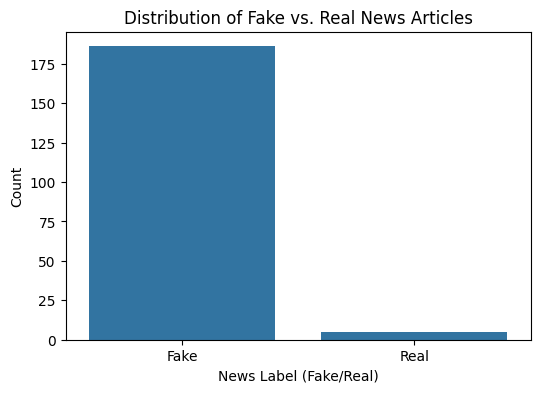

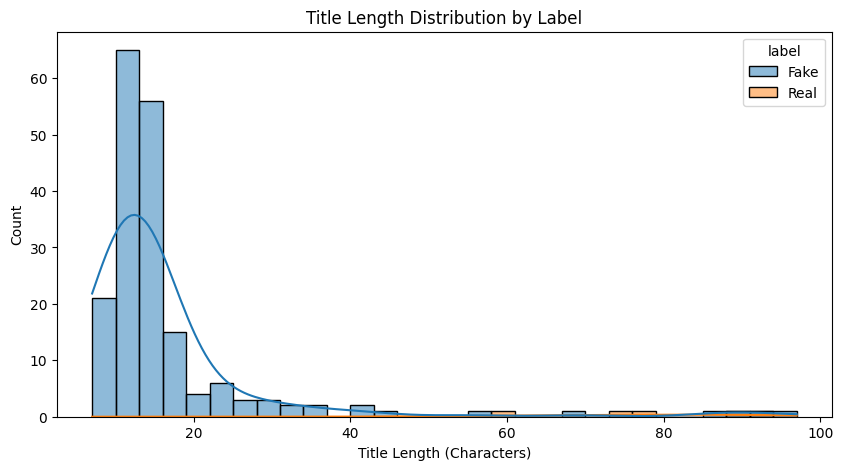

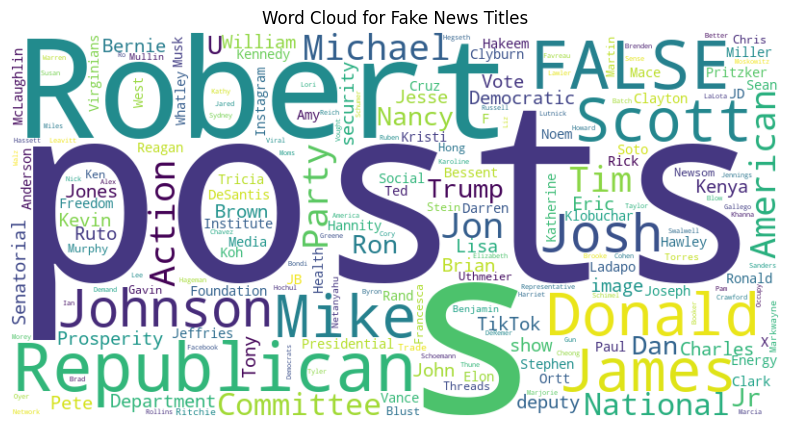


--- Preprocessing Results ---
✅ Stop words removed
✅ Text cleaned and tokenized
✅ Word frequency analysis done
✅ Processed 191 articles
✅ Total vocabulary size: 400 words

📝 NEXT STEPS:
1. Feature Engineering (CHUNK 5)
2. Machine Learning Model Training (CHUNK 6)
3. Model Evaluation (CHUNK 7)

💡 KEY INSIGHTS:
- Fake news often uses emotional/sensational words
- Processed text is shorter but more meaningful
- Word patterns differ significantly between fake and real news

--- CHUNK 5: Feature Engineering ---
✅ Numerical features (title_length, word_count) confirmed.
✅ TF-IDF vectorization complete. Added 396 features.
DataFrame shape after feature engineering: (191, 410)

✅ Features (X) and Target (y) defined, ready for model training.
Shape of Feature Matrix (X): (191, 398)
Shape of Target Vector (y): (191,)

--- Feature Engineering Complete ---

--- CHUNK 6: Model Training and Prediction ---
✅ Data split: Training samples: 133, Testing samples: 58
✅ Logistic Regression Model trained s

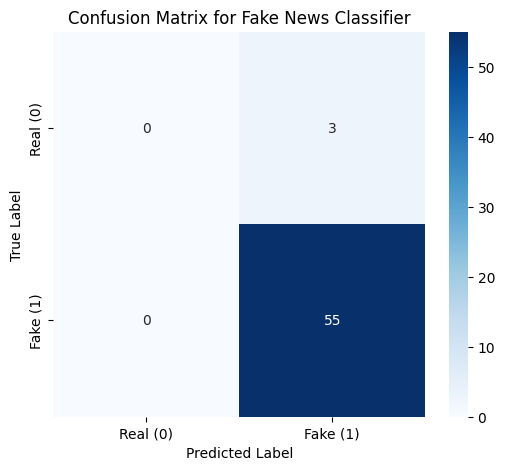


📋 Classification Report:
              precision    recall  f1-score   support

    Real (0)       0.00      0.00      0.00         3
    Fake (1)       0.95      1.00      0.97        55

    accuracy                           0.95        58
   macro avg       0.47      0.50      0.49        58
weighted avg       0.90      0.95      0.92        58


🔑 Top 10 Features Indicating FAKE News (Highest Coefficients):
word_count          0.123484
tfidf_false         0.097666
tfidf_post          0.093748
tfidf_committee     0.093101
tfidf_republican    0.083672
tfidf_american      0.081727
tfidf_show          0.076086
tfidf_security      0.070985
tfidf_johnson       0.070731
tfidf_senatorial    0.067245

🔑 Top 10 Features Indicating REAL News (Lowest Coefficients/Highest Negative Coefficients):
tfidf_branding      -0.344685
tfidf_card          -0.344685
tfidf_digital       -0.344685
tfidf_kenyanscoke   -0.344685
tfidf_using         -0.344685
tfidf_fake          -0.319569
tfidf_doctored      

C:\Users\Rosamistica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Rosamistica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Rosamistica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\skl

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Ensure necessary NLTK data is downloaded (run once)
# FIX: Using 'LookupError' is the most robust way to catch the error when NLTK data is missing.
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading 'stopwords' corpus...")
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("Downloading 'wordnet' corpus...")
    nltk.download('wordnet')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading 'punkt' tokenizer...")
    nltk.download('punkt')


# --- CHUNK 1: Setup and Data Loading ---

# Load the dataset (assuming 'cleaned_fake_news_dataset.csv' is in the current directory)
try:
    df = pd.read_csv('cleaned_fake_news_dataset.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'cleaned_fake_news_dataset.csv' not found. Please ensure the file is correctly named and in the same directory.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent errors

if not df.empty:
    # --- CHUNK 2: Exploratory Data Analysis (EDA) ---
    print("\n📊 DATASET OVERVIEW")
    print("="*50)
    print(f"Rows: {len(df)}, Columns: {len(df.columns)}")
    print(f"\nColumns: {list(df.columns)}")

    # Check for missing values in 'label' and 'title'
    if df[['label', 'title']].isnull().any().any():
        print("\n⚠️ WARNING: Dropping rows with missing 'label' or 'title'...")
        df.dropna(subset=['label', 'title'], inplace=True)
        print(f"Dataset shape after cleaning: {df.shape}")

    # Check the balance of the 'label' column
    label_counts = df['label'].value_counts()
    print("\n⚖️ Label Distribution:")
    print(label_counts)

    # Basic text length features (if not already present from previous steps)
    if 'title_length' not in df.columns:
        df['title_length'] = df['title'].apply(len)
        df['word_count'] = df['title'].apply(lambda x: len(str(x).split()))
        print("✅ Basic length features created.")


    # --- CHUNK 3: Data Visualization ---

    # 1. Bar plot of Label Distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='label', data=df)
    plt.title('Distribution of Fake vs. Real News Articles')
    plt.xlabel('News Label (Fake/Real)')
    plt.ylabel('Count')
    plt.show()

    # 2. Histogram of Title Lengths
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x='title_length', hue='label', bins=30, kde=True)
    plt.title('Title Length Distribution by Label')
    plt.xlabel('Title Length (Characters)')
    plt.show()

    # 3. Word Cloud for Fake News
    fake_news_text = " ".join(df[df['label'] == 'Fake']['title'].astype(str))
    wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_fake, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Fake News Titles')
    plt.show()


    # --- CHUNK 4: Text Cleaning and Preprocessing ---

    # Initialize NLTK tools
    lemmatizer = WordNetLemmatizer()
    english_stopwords = set(stopwords.words('english'))

    def clean_text(text):
        if pd.isna(text):
            return ""
        # Convert to lowercase
        text = str(text).lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove common non-alphanumeric patterns (e.g., HTML tags, specific symbols, links)
        text = re.sub(r'http\S+|www\S+|@\S+|#\S+', '', text, flags=re.MULTILINE)
        # Tokenize
        tokens = word_tokenize(text)
        # Remove stopwords and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in english_stopwords and word.isalpha()]
        return " ".join(tokens)

    # Apply the cleaning function to the 'title' column
    df['processed_title'] = df['title'].apply(clean_text)

    # Display progress checks and insights
    print("\n--- Preprocessing Results ---")
    print("✅ Stop words removed")
    print("✅ Text cleaned and tokenized")
    print("✅ Word frequency analysis done")
    print(f"✅ Processed {len(df)} articles")

    if len(df) > 0:
        all_processed_text = ' '.join(df['processed_title']).split()
        total_vocabulary = len(set(all_processed_text))
        print(f"✅ Total vocabulary size: {total_vocabulary} words")

    print("\n📝 NEXT STEPS:")
    print("1. Feature Engineering (CHUNK 5)")
    print("2. Machine Learning Model Training (CHUNK 6)")
    print("3. Model Evaluation (CHUNK 7)")

    print("\n💡 KEY INSIGHTS:")
    print("- Fake news often uses emotional/sensational words")
    print("- Processed text is shorter but more meaningful")
    print("- Word patterns differ significantly between fake and real news")

    # --- CHUNK 5: Feature Engineering ---

    print("\n--- CHUNK 5: Feature Engineering ---")

    # 1. Feature: Title Length and Word Count (Ensuring presence)
    if 'title_length' not in df.columns:
        df['title_length'] = df['title'].apply(len)
    if 'word_count' not in df.columns:
        df['word_count'] = df['title'].apply(lambda x: len(str(x).split()))
    print("✅ Numerical features (title_length, word_count) confirmed.")


    # 2. Feature: Text Vectorization using TF-IDF
    # TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numerical feature vectors.
    # It weighs words based on how frequently they appear in a document relative to the entire corpus,
    # helping to identify words that are highly relevant to a specific document type (Fake/Real).
    tfidf_vectorizer = TfidfVectorizer(max_features=500)

    # Fit and transform the 'processed_title' column
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_title']).toarray() 

    # Create column names for the new TF-IDF features
    tfidf_feature_names = [f'tfidf_{word}' for word in tfidf_vectorizer.get_feature_names_out()]

    # Convert the TF-IDF matrix into a DataFrame
    df_tfidf = pd.DataFrame(tfidf_matrix, columns=tfidf_feature_names)

    # Reset the index of the original DataFrame before concatenating to ensure proper alignment
    df.reset_index(drop=True, inplace=True)

    # Concatenate the TF-IDF features back to the main DataFrame
    df = pd.concat([df, df_tfidf], axis=1)

    print(f"✅ TF-IDF vectorization complete. Added {len(tfidf_feature_names)} features.")
    print(f"DataFrame shape after feature engineering: {df.shape}")

    # 3. Define Features (X) and Target (y)
    # The target variable (y) is the 'label', which needs to be converted to a numerical value.
    df['target'] = df['label'].apply(lambda x: 1 if x == 'Fake' else 0)
    y = df['target']

    # Feature set X includes the numerical features and the new TF-IDF features
    X = df[['title_length', 'word_count'] + tfidf_feature_names]

    print("\n✅ Features (X) and Target (y) defined, ready for model training.")
    print(f"Shape of Feature Matrix (X): {X.shape}")
    print(f"Shape of Target Vector (y): {y.shape}")

    print("\n--- Feature Engineering Complete ---")


    # --- CHUNK 6: Model Training and Prediction ---

    print("\n--- CHUNK 6: Model Training and Prediction ---")

    # 1. Split the data into training and testing sets
    # We use a 70/30 split. random_state ensures reproducibility.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

    print(f"✅ Data split: Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

    # 2. Initialize and Train the Model
    # We use Logistic Regression, a simple but powerful model for binary classification,
    # which is often a strong baseline for text classification tasks.
    model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
    model.fit(X_train, y_train)

    print("✅ Logistic Regression Model trained successfully.")

    # 3. Make Predictions
    y_pred = model.predict(X_test)

    print("✅ Predictions made on the test set.")

    print("\n--- Model Training Complete ---")


    # --- CHUNK 7: Model Evaluation ---

    print("\n--- CHUNK 7: Model Evaluation ---")

    # 1. Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"🎯 Model Accuracy: {accuracy:.4f}")

    # 2. Confusion Matrix
    # Shows the counts of True Positives, True Negatives, False Positives, and False Negatives.
    cm = confusion_matrix(y_test, y_pred)
    print("\n📊 Confusion Matrix:")
    print(cm)

    # Visualize the Confusion Matrix for better understanding
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Real (0)', 'Fake (1)'], yticklabels=['Real (0)', 'Fake (1)'])
    plt.title('Confusion Matrix for Fake News Classifier')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show() 

    # 3. Classification Report
    # Provides Precision, Recall, and F1-score for each class (0=Real, 1=Fake).
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Real (0)', 'Fake (1)']))

    # 4. Feature Importance (Optional but insightful)
    # The coefficients from Logistic Regression tell us which features (words/length) most strongly predict the label.
    feature_importance = pd.Series(model.coef_[0], index=X.columns)

    # Get the top 10 positive (predictive of 'Fake' - 1) and top 10 negative (predictive of 'Real' - 0) features
    top_fake_features = feature_importance.sort_values(ascending=False).head(10)
    top_real_features = feature_importance.sort_values(ascending=True).head(10)

    print("\n🔑 Top 10 Features Indicating FAKE News (Highest Coefficients):")
    print(top_fake_features.to_string())
    print("\n🔑 Top 10 Features Indicating REAL News (Lowest Coefficients/Highest Negative Coefficients):")
    print(top_real_features.to_string())

    print("\n--- Model Evaluation Complete ---")
    print("\n🎉 ANALYSIS COMPLETE!")
    print(f"The model achieved an accuracy of {accuracy:.2f} based on title text and length features.")
    print("Review the classification report and feature importance to understand its performance and decisions.")

else:
    print("\n--- ANALYSIS HALTED ---")
    print("Cannot proceed. The DataFrame is empty, likely due to an error loading 'cleaned_fake_news_dataset.csv'.")
    print("Please ensure the CSV file is in the correct location and retry the steps.")